In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
video_games_df= pd.read_csv('Cleaned_Video_Games.csv')

In [3]:
video_games_df

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.000000,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.964461,26.364855,7.099509,162.339575,Ubisoft,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.300000,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.000000,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.964461,26.364855,7.099509,162.339575,Ubisoft,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16699,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,68.964461,26.364855,7.099509,162.339575,Ubisoft,E
16700,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,68.964461,26.364855,7.099509,162.339575,Ubisoft,E
16701,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,68.964461,26.364855,7.099509,162.339575,Ubisoft,E
16702,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,68.964461,26.364855,7.099509,162.339575,Ubisoft,E


In [4]:
import seaborn as sns

In [5]:
cols = ['name','platform', 'genre', 'publisher', 'developer', 'rating']
for col in cols:
    uniques = video_games_df[col].value_counts().keys()
    uniques_dict = {}
    count = 0
    for i in uniques:
        uniques_dict[i] = count
        count += 1

    for k, v in uniques_dict.items():
        video_games_df.loc[video_games_df[col] == k, col] = v

In [6]:
df1 = video_games_df[['name','platform','genre','publisher','year_of_release','developer','global_sales']]
df1 = df1.astype('float64')

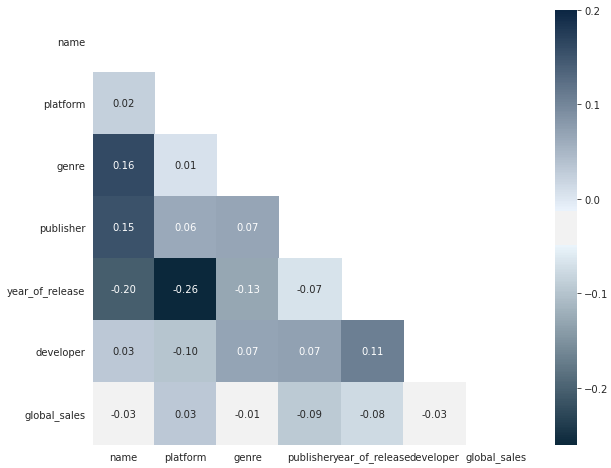

In [7]:
mask = np.zeros_like(df1.corr())
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(600, 250, sep=20, as_cmap=True, s=85, l=15, n=20) # note: 680, 350/470
with sns.axes_style("white"):
    fig, ax = plt.subplots(1,1, figsize=(10,8))
    ax = sns.heatmap(df1.corr(), mask=mask, vmax=0.2, square=True, annot=True, fmt=".2f", cmap=cmap)

After plotting this heatmap it can be observed that there is almost negligible correlation between the variables. Also, some variables have negative correlation too. But to get a broad understanding of the video-game market to see what types of games are preferred and which variables impact sales. These publishers and developers are in the business of making money and generating sales, so they want to see which variables are most important for sales of their video games. Ideally, the results of our analyses will help developers to decide in which platform, genre, or country to release their future video games.

Here, we expect platform, genre and critic score as important variables. The platform variable is used to see which video-game platform users were most profit-generating. This can be important for developers to know, as they may not want to release their games on all platforms.The genre category is another potentially important category for future game releases to decide which type of video game users want to play and critic score because many users decide on video games based on how good the reviews
are, and the number of reviews indicates an inherent interest in the game.

## Label Encoding of Categorical features

In [8]:
from sklearn.preprocessing import LabelEncoder
data = video_games_df.copy()

le = LabelEncoder()
feature = ['platform','genre','critic_score']

for col in feature:
    data[col] = le.fit_transform(video_games_df[col])

In [9]:
X= data[['genre','platform','critic_score','na_sales','eu_sales','jp_sales','other_sales']]
y = data['global_sales']

In [10]:
#train test split of data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2020)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

al_dict={}

In [11]:
X_train

,genre,platform,critic_score,na_sales,eu_sales,jp_sales,other_sales
2855,0,6,52,0.40,0.27,0.00,0.05
11250,5,9,53,0.06,0.02,0.00,0.00
7057,3,6,70,0.13,0.09,0.00,0.01
10528,0,6,52,0.06,0.04,0.00,0.01
14578,4,6,52,0.02,0.01,0.00,0.00
...,...,...,...,...,...,...,...
1661,9,2,60,0.42,0.46,0.15,0.18
11971,0,8,52,0.05,0.02,0.00,0.00
14966,9,6,52,0.01,0.01,0.00,0.00
7491,4,2,44,0.07,0.05,0.06,0.02


In [12]:
y_train

2855     0.72
11250    0.09
7057     0.23
10528    0.10
14578    0.03
         ... 
1661     1.21
11971    0.07
14966    0.03
7491     0.21
9056     0.14
Name: global_sales, Length: 11692, dtype: float64

In [13]:
X_test

,genre,platform,critic_score,na_sales,eu_sales,jp_sales,other_sales
13293,1,10,62,0.04,0.01,0.00,0.00
11215,7,9,52,0.00,0.00,0.08,0.00
8246,1,9,54,0.12,0.05,0.00,0.00
3969,8,0,65,0.24,0.19,0.00,0.06
2671,6,6,52,0.18,0.12,0.42,0.05
...,...,...,...,...,...,...,...
353,4,0,66,1.93,1.22,0.03,0.44
2784,0,2,38,0.17,0.41,0.00,0.15
8009,6,2,44,0.14,0.03,0.00,0.02
11403,6,3,52,0.08,0.00,0.00,0.01


In [14]:
X_test.critic_score.unique()

array([62, 52, 54, 65, 32, 67, 37, 30, 33, 38, 51, 74, 47, 70, 59, 58, 68,
       17, 49, 55, 45, 22, 39, 56, 57, 48, 73, 64, 34, 43, 44, 71, 41, 60,
       61, 35, 18, 50, 53, 72, 46, 63, 40, 79,  8, 66, 75, 42, 25, 15, 69,
       28, 29, 26, 27, 13, 24, 36, 23, 78, 21, 31, 76, 19, 77, 82, 16, 81,
       11, 80,  4,  9, 14, 12,  2, 20,  7,  6, 10], dtype=int64)

In [15]:
X_test.platform.unique()

array([10,  9,  0,  6,  3,  7,  5, 11, 16,  1,  2, 19, 15, 18, 13,  4,  8,
       22, 12, 14, 23, 21, 17, 20, 25, 24, 27, 26, 29, 30])

In [16]:
y_test

13293    0.05
11215    0.09
8246     0.17
3969     0.50
2671     0.76
         ... 
353      3.61
2784     0.73
8009     0.18
11403    0.08
13126    0.05
Name: global_sales, Length: 5012, dtype: float64

## Best Fit Line drawn using Linear Regression

Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It is a statistical method that is used for predictive analysis. It's used to predict values within a continuous range.

In [17]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()

#training the model using the feature and label
clf.fit(X_train,y_train)

#making predictions on the test data
predicted = clf.predict(X_test)
expected = y_test


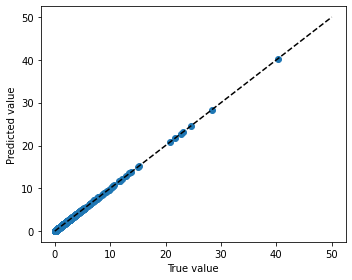

In [18]:
#plotting the best fit line

plt.figure(figsize=(5,4))
plt.scatter(expected,predicted)
plt.plot([0,50],[0,50],'--k')
plt.axis('tight')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.tight_layout()

The Line of Best Fit is used to express a relationship in a scatter plot of different data points. It can be seen that there is very little scatter that is it is showing there is strong correlation between the variables. But this the limitation of linear regression it assumes that there is a straight-line relationship between them.

In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("Mean squared error:",  mean_squared_error(expected,predicted))
print("Mean absolute error:",mean_absolute_error(expected,predicted))

clf_r2=r2_score(expected,predicted)
al_dict["LinearRegression"]=clf_r2
print("R2 score :", clf_r2)


Mean squared error: 2.7012550364028058e-05
Mean absolute error: 0.0029022897692201448
R2 score : 0.9999873817624272


In [20]:
clf.predict([[6,6,52,0.18,0.12,0.42,0.05]])

array([0.77029778])

## K-nearest Neighbors Regressor

KNN algorithm is a non-parametric method that can be used for both classification and regression problems. The KNN algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set.

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

knn = KNeighborsRegressor(n_neighbors=2) 
knn.fit( X_train , y_train )
y_pred = knn.predict(X_test)


print("Mean absolute error:",mean_absolute_error(y_test, y_pred))
print("Mean_squared_error:",mean_squared_error(y_test, y_pred))

knn_r2=r2_score(y_test, y_pred)
al_dict["KNeighborsRegressor"]=knn_r2
print("R2-Score:",knn_r2)




Mean absolute error: 0.1996717877094972
Mean_squared_error: 0.29279765063846774
R2-Score: 0.8632268976186123


In [22]:
knn.predict([[6,6,52,0.18,0.12,0.42,0.05]])

array([0.41])

## Decision Tree Regressor

A decision tree is a supervised machine learning model used to predict a target by learning decision rules from features. Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output.

In [23]:
depth_range = [3,4,5,6,7,8,9,10,11,12,15]
minsplit_range = [5,10,20,25,30]
minleaf_range = [5,10,15]

parameters = dict(max_depth=depth_range,
                  min_samples_split=minsplit_range, 
                  min_samples_leaf=minleaf_range)

from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=2020,shuffle=True)

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV
clf = DecisionTreeRegressor(random_state=2020)
cv = GridSearchCV(clf, param_grid=parameters,cv=kfold,scoring='r2')

cv.fit(X,y)
# Best Parameters
print(cv.best_params_)
best_model = cv.best_estimator_
print(best_model)


from sklearn.metrics import mean_squared_error,mean_absolute_error
print("Mean squared error:",mean_squared_error(y_test, y_pred))
print("Mean absolute error:",mean_absolute_error(y_test, y_pred))

cv_r2=cv.best_score_
al_dict["DecisionTreeRegressor"]=cv_r2
print("R2 Score",cv.best_score_)


{'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 5}
DecisionTreeRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=5,
                      random_state=2020)
Mean squared error: 0.29279765063846774
Mean absolute error: 0.1996717877094972
R2 Score 0.9160149563874432


In [24]:
cv.predict([[6,6,52,0.18,0.12,0.42,0.05]])

array([0.81555556])

## Random Forest Regressor

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees. The hyperparameters in random forest are either used to increase the predictive power of the model or to make the model faster.

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

import numpy as np
parameters = {'max_features': np.arange(1,11),'n_estimators':[50,100]}

from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=2020,shuffle=True)

model_rf = RandomForestRegressor(random_state=2020)
cv = GridSearchCV(model_rf, param_grid=parameters,
                  cv=kfold,scoring='r2')

cv.fit( X , y )

results_df = pd.DataFrame(cv.cv_results_  )

print(cv.best_params_)

print(cv.best_estimator_)

from sklearn.metrics import mean_squared_error,mean_absolute_error
print("Mean squared error:",mean_squared_error(y_test, y_pred))
print("Mean absolute error:",mean_absolute_error(y_test, y_pred))

cv_r2=cv.best_score_
al_dict["RandomForestRegressor"]=cv_r2
print("R2 Score",cv.best_score_)



{'max_features': 5, 'n_estimators': 100}
RandomForestRegressor(max_features=5, random_state=2020)
Mean squared error: 0.29279765063846774
Mean absolute error: 0.1996717877094972
R2 Score 0.9457741283622431


In [26]:
cv.predict([[6,6,52,0.18,0.12,0.42,0.05]])

array([0.7522])

## Extreme Gradient Boosting Regressor

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.
It is an efficient implementation of gradient boosting for classification and regression problems.

In [27]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)


print("mean absolute error:",mean_absolute_error(y_test, y_pred))
print("Mean squared error:",mean_squared_error(y_test, y_pred))

xgb_r2=r2_score(y_test, y_pred)
al_dict["XGBRegressor"]=xgb_r2
print("R2 score:",xgb_r2)


mean absolute error: 0.029684816919875175
Mean squared error: 0.05554200140789146
R2 score: 0.974054942625176


In [28]:
gbm= pd.DataFrame([[6,6,52,0.18,0.12,0.42,0.05]],columns=X_test.columns)
gbm
#gbm= pd.DataFrame(X_test.iloc[5]).T

,genre,platform,critic_score,na_sales,eu_sales,jp_sales,other_sales
0,6,6,52,0.18,0.12,0.42,0.05


In [29]:
xgb.predict(gbm)

array([0.7982436], dtype=float32)

## Voting Regressor

A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. Then it averages the individual predictions to form a final prediction. A voting ensemble involves summing the predictions made by classification models or averaging the predictions made by regression models.

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import VotingRegressor

knn = KNeighborsRegressor() 
dtr= DecisionTreeRegressor()
lr = LinearRegression()
rf= RandomForestRegressor(n_estimators=100, random_state=2020)
xgb = XGBRegressor()

# Average (by default voting= hard voting)
voting = VotingRegressor(estimators=[('KNN',knn),('DTR',dtr),('LR',lr),('RF',rf),('XGB',xgb)])

for reg in (knn,dtr,lr,rf,xgb,voting):
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    print(reg.__class__.__name__,r2_score(y_test,y_pred))


KNeighborsRegressor 0.8226062904578578
DecisionTreeRegressor 0.9616235527034361
LinearRegression 0.9999873817624272
RandomForestRegressor 0.9740168614348449
XGBRegressor 0.974054942625176
VotingRegressor 0.9691186708823434


Though r2 score of linear regression is 0.99 it can't be said that model is good for prediction because it has some limitations such as: 
1) Linear regression only looks at linear relationships between dependent and independent variables. That is, it assumes there is a straight-line relationship between them. Sometimes this is incorrect.
2) Linear regression looks at a relationship between the mean of the dependent variable and the independent variables. However, sometimes it need to look at the extremes of the dependent variable. Just as the mean is not a complete description of a single variable, linear regression is not a complete description of relationships among variables.
3) The biggest limitation is the assumption of normality. It assumes that the sampling distribution is normally distributed. If this assumption is not met the results are not reliable, this is the largest source of error.

The r2-score of K-nearest neighbor,Decision tree, Random forest, xgboost, voting are 0.822, 0.607, 0.976, 0.974, 0.970 respectively. On the basis of voting model it can be observed that XGBoost Regressor model performs the best among them, with the result of 0.976. Compared with the other prediction models XGBoost regression model plays a prominent role in improving video game sales prediction accuracy in the field of large-scale product sales data.

[99.99873817624272, 86.32268976186123, 91.60149563874432, 94.57741283622431, 97.4054942625176]


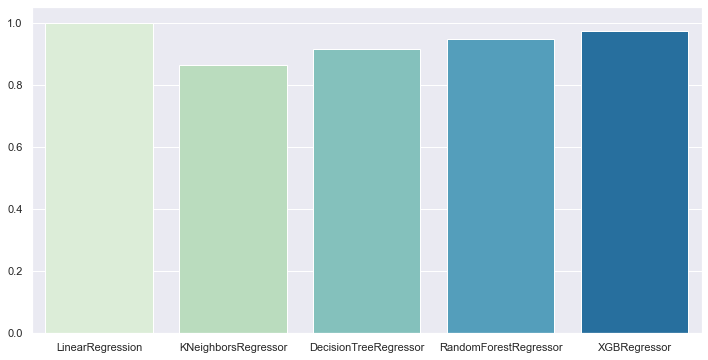

In [32]:
import seaborn as sns

algo_name = list(al_dict.keys())
R2_Score_list = list(al_dict.values())
R2_pr_list=[]
for i in R2_Score_list:
    R2_pr_list.append(i*100)
   
print( R2_pr_list)

sns.set(rc={'figure.figsize':(12,6)})

with sns.color_palette("GnBu", 5):
    sns.barplot(x=algo_name,y=R2_Score_list)
